
 # Linear Regression

## PETE 2061 Lab 9

<a id='top'></a>

In [27]:
import numpy as np
import scipy.stats as ss 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

# Correlation and Linear Regression

## A simple data set

In [28]:
x = [1,2,3,4,5,6,7,8,9,10]
y = [1.1,1.9,3.2,4.2,5.1,6.1,6.8,7.9,9.3,11]

### Calculate Z-scores

In [29]:
z_x = (x-np.mean(x))/np.std(x, ddof=1)  #uses sample std when ddof=1. It means you divide by (n-1) and not n.
z_x

array([-1.48630108, -1.15601195, -0.82572282, -0.49543369, -0.16514456,
        0.16514456,  0.49543369,  0.82572282,  1.15601195,  1.48630108])

**The default degree of freedom (ddof) when ddof is not provided is 0, which means it calculates population standard deviation, and not sample standard deviation**
* For sample variance: $\sigma^2 = \frac{\sum_{i=1}^n (x_i - \mu)^2}{n-1} $ <br><br>
* For population variance: $\sigma^2 = \frac{\sum_{i=1}^n (x_i - \mu)^2}{n} $ <br><br>
* Recall that standard deviation is the square root of variance.
* ddof = 1 implies that the data given is a sample from a population, while ddof = 0 (which is the default) implies that the data given is the population.

In [30]:
z_x = ss.zscore(x,ddof=1) # ddof = 1 (uses sample std)
z_y = ss.zscore(y,ddof=1)

In [31]:
z_x

array([-1.48630108, -1.15601195, -0.82572282, -0.49543369, -0.16514456,
        0.16514456,  0.49543369,  0.82572282,  1.15601195,  1.48630108])

In [32]:
z_y

array([-1.42853853, -1.17791773, -0.77065894, -0.45738295, -0.17543456,
        0.13784144,  0.35713463,  0.70173822,  1.14032461,  1.6728938 ])

In [33]:
z_x = ss.zscore(x)  #this will assume that x is the population and not a sample. ie. ddof=0
z_x

array([-1.5666989 , -1.21854359, -0.87038828, -0.52223297, -0.17407766,
        0.17407766,  0.52223297,  0.87038828,  1.21854359,  1.5666989 ])

### Calculate $r$ value

In [34]:
zx = ss.zscore(x,ddof=len(x)-1) # this trick with ddof takes out the division by n-1 or n in std. 
zy = ss.zscore(y,ddof=len(y)-1) # n - (n-1) = 1
sum(zx*zy)    # compare this with the formula for r in lecture note.

0.995627257890435

### Calculate $r^2$ (this is what excel gives you)

In [35]:
(sum(zx*zy))**2

0.9912736366544268

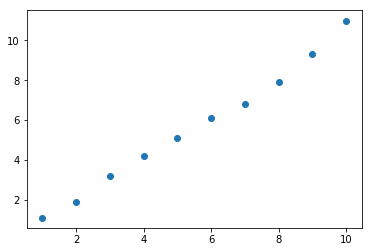

In [36]:
plt.scatter(x,y)
plt.show()

### Perform Linear Regression

In [37]:
[slope, intercept, r_value, p_value, std_err]=ss.linregress(x,y)
print(f" slope = {slope} \n intercept = {intercept} \n r_value = {r_value} \n p_value = {p_value} \n std_err = {std_err} ")

 slope = 1.0496969696969698 
 intercept = -0.11333333333333417 
 r_value = 0.9956272578904354 
 p_value = 1.591156211680006e-09 
 std_err = 0.03482080587205541 


In [38]:
y_model = slope*np.array(x) + intercept    # y = mx + b

In [39]:
y_model

array([ 0.93636364,  1.98606061,  3.03575758,  4.08545455,  5.13515152,
        6.18484848,  7.23454545,  8.28424242,  9.33393939, 10.38363636])

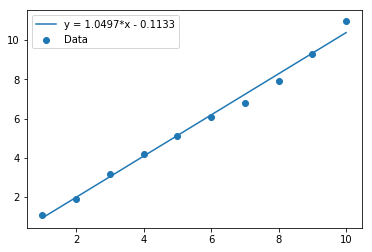

In [40]:
plt.scatter(x,y)
plt.plot(x,y_model)

#create a string that describes the equation of the regressed line  
sign = '+' if intercept>0 else '-'            #Pythonic version
txt = 'y = ' + str(round(slope,4)) + '*x '+ sign + ' ' + str(abs(round(intercept,4)))

plt.legend([txt,'Data'])
plt.show()

#More verbose way of implementing the if statement
#if intercept > 0:
#    sign = '+'
#else:
#    sign = '-'

#this won't show a plus in the case of a +ve intercept
#txt = 'y = '+str(round(slope,4))+'*x '+' '+str(round(intercept,4))  


### Properties of Correlation Coefficient
It is not changed by:
* Multiplying each value by a positive constant
* Adding a constant to each value
* Interchanging x and y

The two cells below show this:

In [41]:
[slope,inter,r,p,stderr]=ss.linregress(2*np.array(x)+7,y)
r

0.9956272578904354

In [42]:
[slope,inter,r,p,stderr]=ss.linregress(y,x)
r

0.9956272578904354

## Porosity from Seismic Data
Estimating porosity from seismic signal transit time is a great use of Least-Squares Lines and correlations. First let us look at some data.


In [43]:
depth = np.arange(2000,14000,1000)
poro = np.array([.346,.318,.292,.268,.246,.226,.208,.191,.175,.161,.148,.136])
intTrans = np.array([153,140,132,126,118,120,112,106,102,103,93,96])
matTrans = np.array([122,108,100,96,88,94,87,82,79,83,73,78])
df = pd.DataFrame({'AveDepth':depth,'Porosity':poro,'IntervalTransitTime':intTrans,'MatrixTransitTime':matTrans})

In [44]:
df

,AveDepth,Porosity,IntervalTransitTime,MatrixTransitTime
0,2000,0.346,153,122
1,3000,0.318,140,108
2,4000,0.292,132,100
3,5000,0.268,126,96
4,6000,0.246,118,88
5,7000,0.226,120,94
6,8000,0.208,112,87
7,9000,0.191,106,82
8,10000,0.175,102,79
9,11000,0.161,103,83


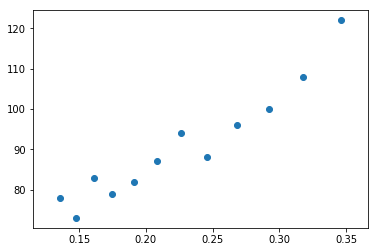

In [45]:
plt.scatter(df.Porosity, df['MatrixTransitTime'])
plt.show()

In [46]:
[slope,inter,r,p,stderr]=ss.linregress(df['Porosity'],df['MatrixTransitTime'])
print(slope,inter,r)

194.86063849756223 46.74611387325988 0.9529890656625238


***The equation for the line of best fit is: $t_{ma}=46.746+194.86\phi$***

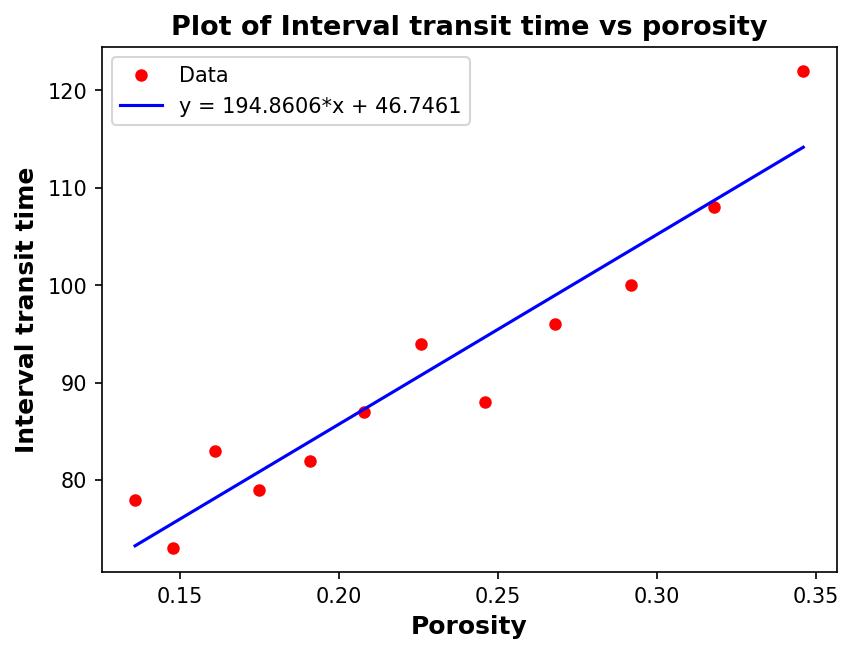

In [47]:
t_ma = np.array(df['Porosity'])*slope+inter

Fig1 = plt.figure(figsize=(7,5), dpi=150)
# Add set of axes to figure
axes = Fig1.add_axes([0.15, 0.15, 0.7, 0.7])# left, bottom, width, height (range 0 to 1)

axes.plot(df['Porosity'],df['MatrixTransitTime'], color="red", ls='none', marker='o', markersize=5,label = 'Data')

sign = '+' if inter>0 else '-'           
txt = 'y = '+str(round(slope,4))+'*x '+sign+' '+str(abs(round(inter,4)))

axes.plot(df['Porosity'], t_ma, color="blue",label = txt)

axes.legend()
axes.set_title('Plot of Interval transit time vs porosity', fontsize=13, fontweight='bold')
axes.set_xlabel('Porosity', fontsize=12, fontweight='bold') # Notice the use of set_ to begin methods
axes.set_ylabel('Interval transit time', fontsize=12, fontweight='bold')

#Code below shows how to save plot. Note that dpi=600 gives high resolution, which is good for publications...
Fig1.savefig("LinearRegression.png", dpi=600)

**Can you fit a straight line model (linear regression) to the data for interval transit time as a function of average depth?**

## Example
An engineer wants to predict the value for y when x=4.5 using the following data set:

In [48]:
x = np.arange(1,11,1)
y = np.array([0.2,0.3,0.5,0.5,1.3,2.3,2.9,4.5,8.7,12.])

In [49]:
df = pd.DataFrame({'x':x,'y':y})
df

,x,y
0,1,0.2
1,2,0.3
2,3,0.5
3,4,0.5
4,5,1.3
5,6,2.3
6,7,2.9
7,8,4.5
8,9,8.7
9,10,12.0


## Construct a scatter plot

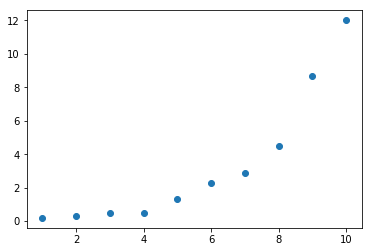

In [50]:
plt.scatter(x,y)
plt.show()

### Should the least-squares line be used to predict the value of y when x=4.5?

In [51]:
[slope,inter,r,p,stderr]=ss.linregress(df['x'],df['y'])
print (slope,inter,r)

1.170909090909091 -3.119999999999999 0.8809813800237662


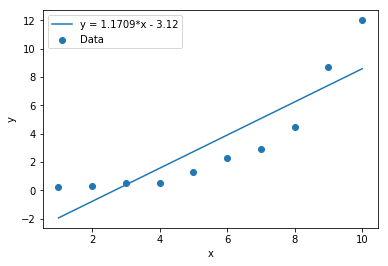

In [52]:
y1 = np.array(df.x)*slope+inter
plt.scatter(df['x'],df['y'])
plt.plot(df['x'],y1)
sign = '+' if inter>0 else '-'           
txt = 'y = '+str(round(slope,4))+'*x '+sign+' '+str(abs(round(inter,4)))
plt.legend([txt,'Data'])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [53]:
x = 4.5
y = x*slope+inter
print('y =',y,'for x =',x)

y = 2.1490909090909103 for x = 4.5


### Construct a scatter plot of (x,z) where z = ln(y)

In [54]:
df['z'] = np.log(df['y'])

In [55]:
df

,x,y,z
0,1,0.2,-1.609438
1,2,0.3,-1.203973
2,3,0.5,-0.693147
3,4,0.5,-0.693147
4,5,1.3,0.262364
5,6,2.3,0.832909
6,7,2.9,1.064711
7,8,4.5,1.504077
8,9,8.7,2.163323
9,10,12.0,2.484907


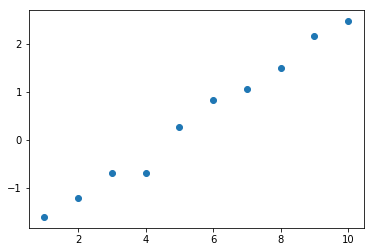

In [56]:
plt.scatter(df.x,df.z)

### Perform a regression and find slope, intercept and r values

In [57]:
[slope,inter,r,p,stderr]=ss.linregress(df['x'],df['z'])
print (slope,inter,r)

0.468184323440667 -2.1637551670496777 0.99346064102356


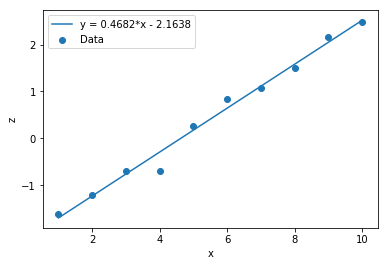

In [58]:
z1 = np.array(df.x)*slope+inter
plt.scatter(df.x,df.z)
plt.plot(df.x,z1)
sign = '+' if inter>0 else '-'        
txt = 'y = '+str(round(slope,4))+'*x '+sign+' '+str(abs(round(inter,4)))
plt.legend([txt,'Data'])
plt.xlabel('x')
plt.ylabel('z')
plt.show()

### How do we now predict y when x = 4.5?

In [59]:
x = 4.5
z = x*slope+inter
y = np.exp(z)
print('y =',y,'for x =',x)

y = 0.9446642443866272 for x = 4.5
